# Crime Rates over Time by Jurisdiction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../code")

In [2]:
import loaders.cityprotect as cp

In [3]:
from analysis.grouping import time_bin_cityprotect_incident_types

In [4]:
prop_list = ["Breaking & Entering", "Property Crime", "Theft of Vehicle", "Theft from Vehicle", "Theft"]
violent_list = ["Assault", "Robbery", "Sexual Offense", "Homicide", "Rape"]

In [5]:
local_depts = ["Los Altos Police Department",
         "Union City Police"]

In [6]:
sheriff_cities = ["Los Altos Hills",
                  "Saratoga",
                  "Cupertino"] 

In [7]:
depts = local_depts + sheriff_cities

In [8]:
dfs = {dept: cp.cityprotect("../data/raw_data/{}".format(dept.replace(" ", "_"))) for dept in local_depts}

Loading from 24 files.


TypeError: NDFrame._add_numeric_operations.<locals>.any() takes 1 positional argument but 2 were given

In [9]:
sheriff_df = pd.read_pickle("../data/clean_data/SCCSheriff_2017_2022_inferredCity.pkl")

In [10]:
sheriff_df = cp.reclassify_incidents(sheriff_df)

In [11]:
dfs.update({city:sheriff_df[sheriff_df["inferredCity"]==city] for city in sheriff_cities})

In [31]:
monthly_dfs = {dept:time_bin_cityprotect_incident_types(dfs[dept]) for dept in depts}

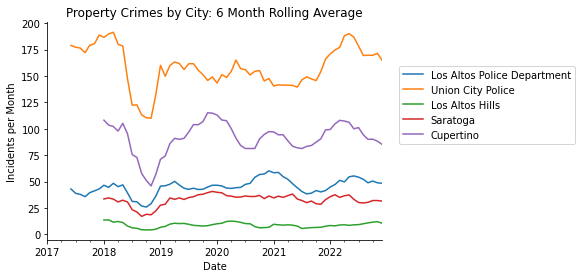

In [33]:
fig, axs = plt.subplots()
for city, monthly_df in monthly_dfs.items():
    monthly_df[monthly_df.columns.intersection(prop_list)].sum(axis=1).rolling(window=6).mean().plot(label=city, ax=axs)
axs.set(xlabel="Date", ylabel="Incidents per Month")
axs.set(title="Property Crimes by City: 6 Month Rolling Average")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
fig.savefig("Property Crimes by City.png", bbox_inches="tight")

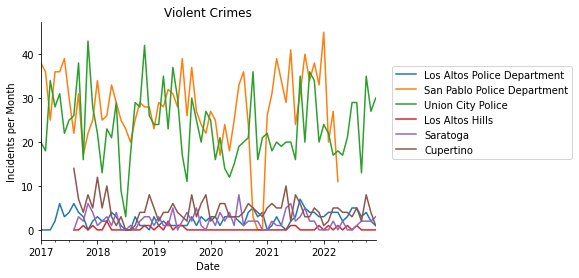

In [14]:
fig, axs = plt.subplots()
for city, monthly_df in monthly_dfs.items():
    monthly_df[monthly_df.columns.intersection(violent_list)].sum(axis=1).plot(label=city, ax=axs)
axs.set(xlabel="Date", ylabel="Incidents per Month")
axs.set(title="Violent Crimes")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()

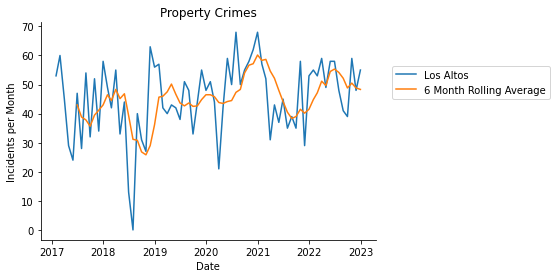

In [22]:
fig, axs = plt.subplots()
city="Los Altos"
monthly_df = monthly_dfs["Los Altos Police Department"]
axs.plot(monthly_df[monthly_df.columns.intersection(prop_list)].sum(axis=1), label=city)
axs.plot(monthly_df[monthly_df.columns.intersection(prop_list)].sum(axis=1).rolling(window=6).mean(), label="6 Month Rolling Average")
axs.set(xlabel="Date", ylabel="Incidents per Month")
axs.set(title="Property Crimes")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left', borderaxespad=0)
sns.despine()
fig.savefig("Los Altos Property Crime Rate.png", bbox_inches="tight")

In [27]:
pd.set_option('display.max_rows', 300)
monthly_df[monthly_df.columns.intersection(prop_list)].sum(axis=1)

date
2017-01-31    53
2017-02-28    60
2017-03-31    45
2017-04-30    29
2017-05-31    24
2017-06-30    47
2017-07-31    28
2017-08-31    54
2017-09-30    32
2017-10-31    52
2017-11-30    34
2017-12-31    58
2018-01-31    49
2018-02-28    42
2018-03-31    55
2018-04-30    33
2018-05-31    44
2018-06-30    13
2018-07-31     0
2018-08-31    40
2018-09-30    31
2018-10-31    27
2018-11-30    63
2018-12-31    56
2019-01-31    57
2019-02-28    42
2019-03-31    40
2019-04-30    43
2019-05-31    42
2019-06-30    38
2019-07-31    51
2019-08-31    48
2019-09-30    33
2019-10-31    44
2019-11-30    55
2019-12-31    48
2020-01-31    51
2020-02-29    44
2020-03-31    21
2020-04-30    42
2020-05-31    59
2020-06-30    50
2020-07-31    68
2020-08-31    50
2020-09-30    55
2020-10-31    58
2020-11-30    62
2020-12-31    68
2021-01-31    57
2021-02-28    52
2021-03-31    31
2021-04-30    43
2021-05-31    37
2021-06-30    45
2021-07-31    35
2021-08-31    39
2021-09-30    35
2021-10-31    58
2021-11-3